# **K-NEAREST NEIGHBOURS**

In [86]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [87]:
# Load the dataset
zoo = pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## EDA

In [88]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [89]:
# check null values
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [90]:
# count for the values of all variables in zoo

for col in zoo.columns:
  print(f'Column {col}: {zoo[col].value_counts()}')

Column animal name: animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64
Column hair: hair
0    58
1    43
Name: count, dtype: int64
Column feathers: feathers
0    81
1    20
Name: count, dtype: int64
Column eggs: eggs
1    59
0    42
Name: count, dtype: int64
Column milk: milk
0    60
1    41
Name: count, dtype: int64
Column airborne: airborne
0    77
1    24
Name: count, dtype: int64
Column aquatic: aquatic
0    65
1    36
Name: count, dtype: int64
Column predator: predator
1    56
0    45
Name: count, dtype: int64
Column toothed: toothed
1    61
0    40
Name: count, dtype: int64
Column backbone: backbone
1    83
0    18
Name: count, dtype: int64
Column breathes: breathes
1    80
0    21
Name: count, dtype: int64
Column venomous: venomous
0    93
1     8
Name: count, dtype: int64
Column fins: fins
0    84
1    17
Name: count, dtype: i

In [124]:
zoo.describe()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,1.544554,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,1.253194,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,7.000000


## Data Visualization

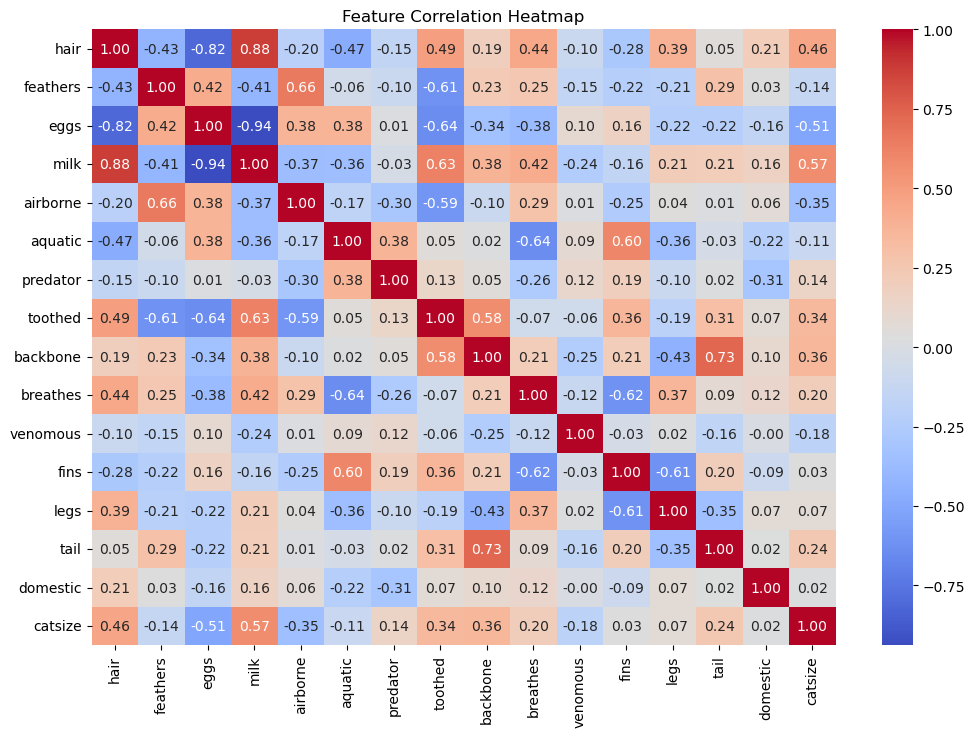

In [91]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(
    zoo.drop(columns=['animal name', 'type']).corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Feature Correlation Heatmap')
plt.show()

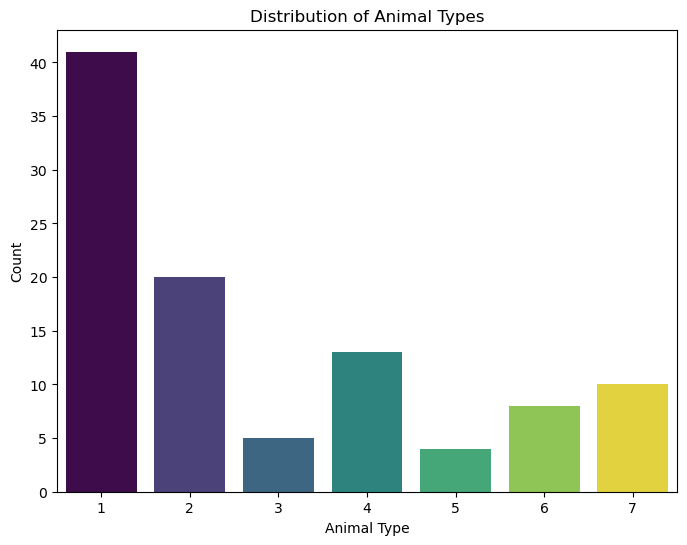

In [92]:
# Countplot for the target variable (animal type distribution)
plt.figure(figsize=(8, 6))
sns.countplot(data=zoo, x='type',hue='type', palette='viridis',legend=False)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

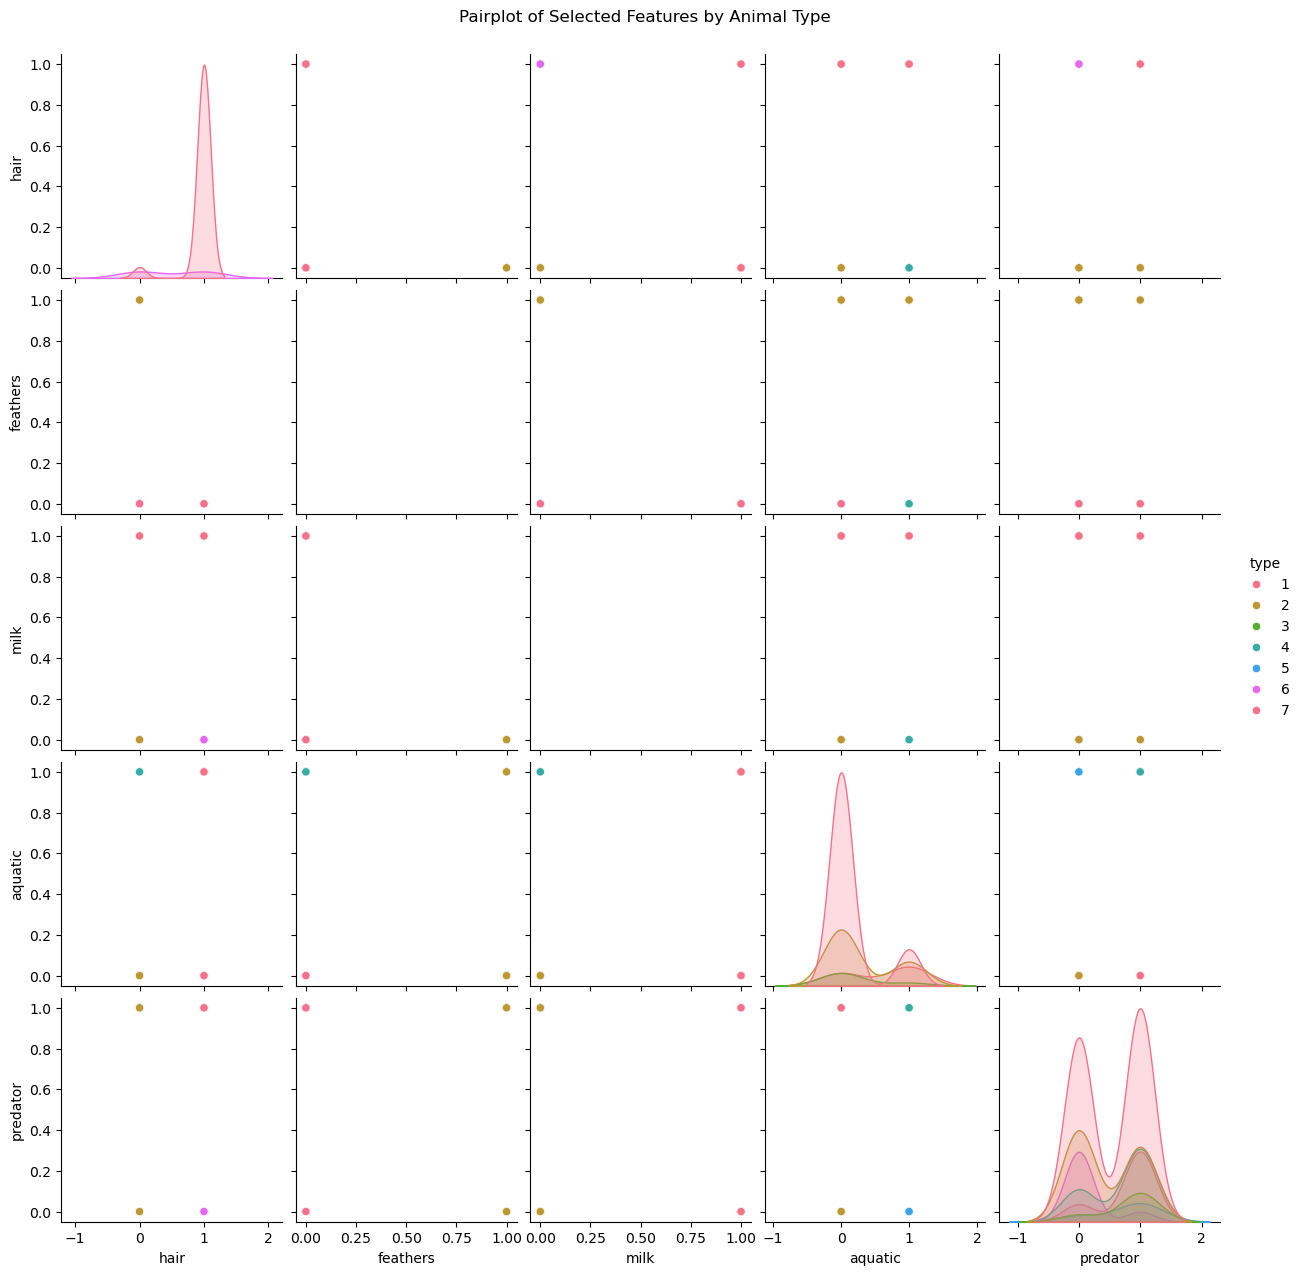

In [93]:
# Pairplot for selected features to visualize relationships
selected_features = ['hair', 'feathers', 'milk', 'aquatic', 'predator', 'type']
sns.pairplot(zoo[selected_features], hue='type', palette='husl')
plt.suptitle('Pairplot of Selected Features by Animal Type', y=1.02)
plt.show()


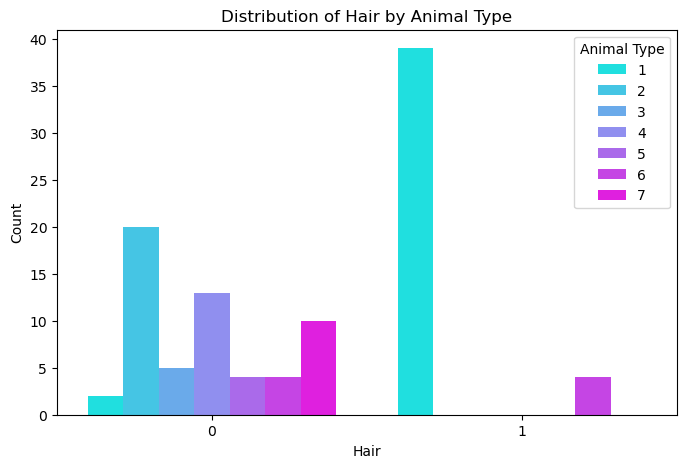

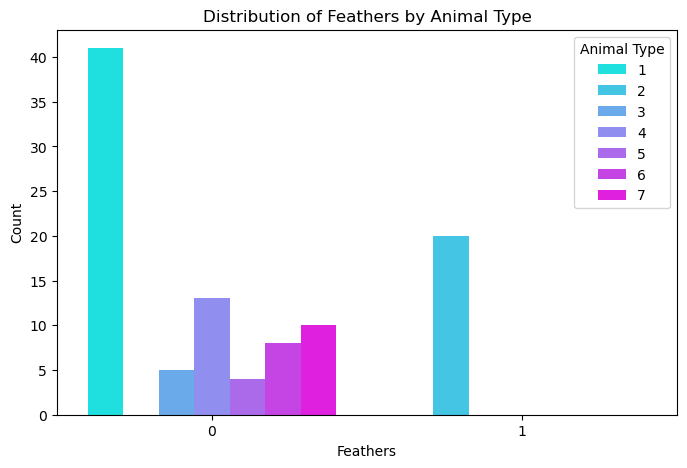

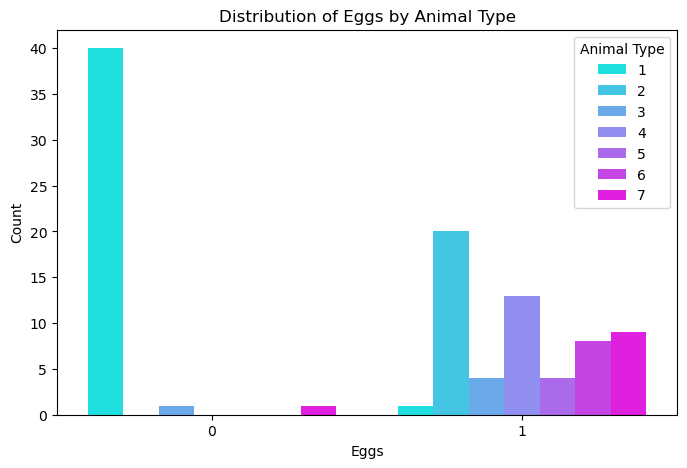

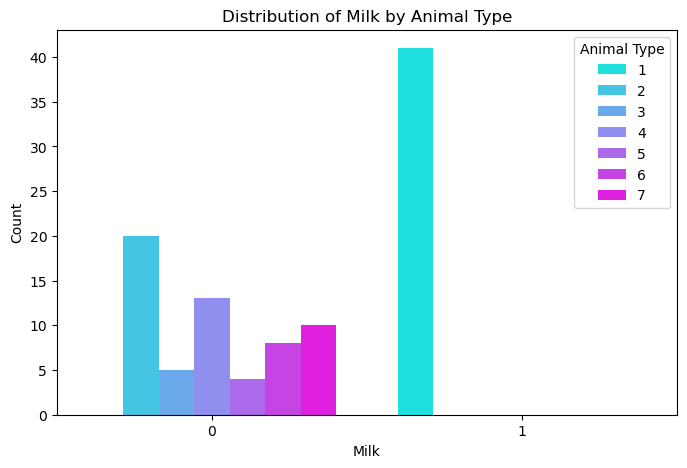

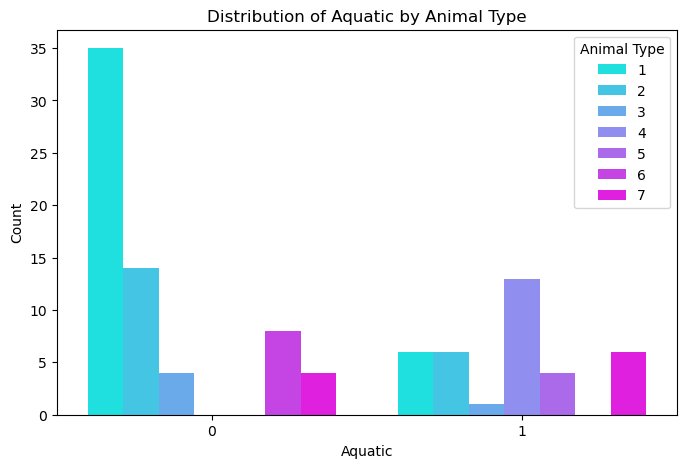

In [94]:
# Bar plot for categorical features distribution
categorical_features = ['hair', 'feathers', 'eggs', 'milk', 'aquatic']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=zoo, x=feature, hue='type', palette='cool')
    plt.title(f'Distribution of {feature.capitalize()} by Animal Type')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Animal Type')
    plt.show()

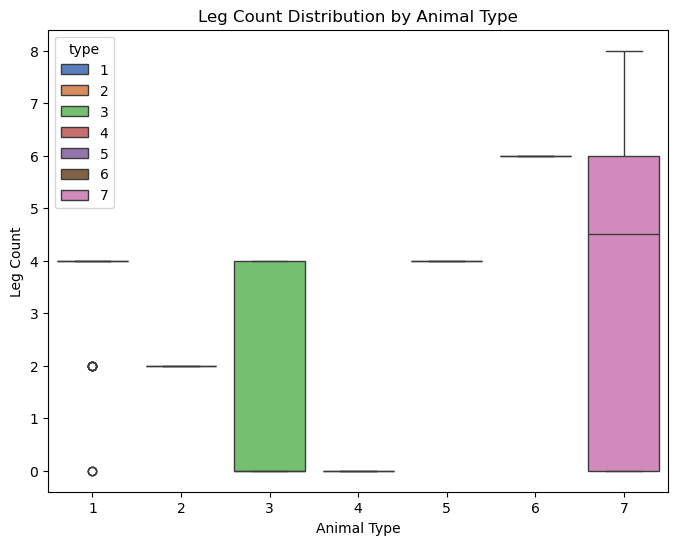

In [95]:
# Boxplot for numerical feature: legs
plt.figure(figsize=(8, 6))
sns.boxplot(data=zoo, x='type',hue='type', y='legs', palette='muted')
plt.title('Leg Count Distribution by Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Leg Count')
plt.show()

## Data Preprocessing

In [96]:
# apply label encoding to legs variable
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
zoo['legs'] = LE.fit_transform(zoo['legs'])
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,1


In [97]:
print(zoo['legs'].value_counts())

legs
2    38
1    27
0    23
4    10
5     2
3     1
Name: count, dtype: int64


In [98]:
# Drop the 'animal name' column and separate features and target
X = zoo.drop(columns=['animal name', 'type'])
Y = zoo['type']

In [99]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1


In [100]:
Y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

## Data Transformation and Model Fitting

In [101]:
# data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3)

In [102]:
# model fitting
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

<Axes: >

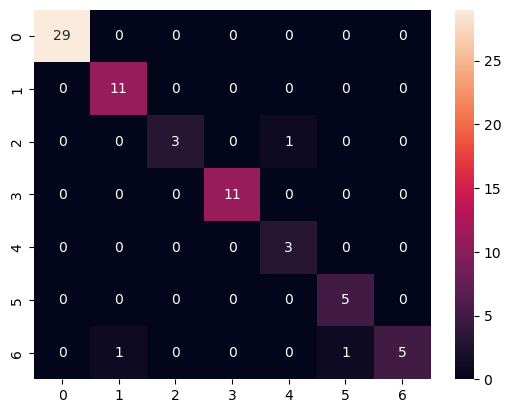

In [103]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_train, Y_pred_train)
sns.heatmap(cm,annot=True)

In [116]:
# get training and test accuracy
traningscore = accuracy_score(Y_train,Y_pred_train)
print("traning accuracy score:", np.round(traningscore,2))

testscore = accuracy_score(Y_test,Y_pred_test)
print("test accuracy score:", np.round(testscore,2))

traning accuracy score: 0.96
test accuracy score: 0.97


In [117]:
# applying different k value with their CV
training_accuracy_list = []
test_accuracy_list = []

for k in range(3, 18, 2):
    training_acc = []
    test_acc = []

    for i in range(1,101):
        X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train,Y_train)
        Y_pred_train = model.predict(X_train)
        Y_pred_test = model.predict(X_test)
        training_acc.append(accuracy_score(Y_train,Y_pred_train))
        test_acc.append(accuracy_score(Y_test,Y_pred_test))

    training_accuracy_list.append(np.mean(training_acc).round(2))
    test_accuracy_list.append(np.mean(test_acc).round(2))


print(training_accuracy_list)
print(test_accuracy_list)

[0.96, 0.93, 0.89, 0.84, 0.82, 0.8, 0.79, 0.78]
[0.91, 0.86, 0.82, 0.79, 0.77, 0.76, 0.75, 0.74]


Highest test acuracy and low variance for all target variables comparitively is obtained for k=5. Therefore we fit the model with k=-5

In [118]:
# cross validation

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

a = np.round(np.mean(training_acc),2)
b = np.round(np.mean(test_acc),2)
print("Cross validatin training accuracy: ",a)
print("Cross validatin test accuracy: ",b)

Cross validatin training accuracy:  0.93
Cross validatin test accuracy:  0.86


In [119]:
# Model accuracy after cross validation and fixing value of k
print("Model training accuracy: ",a)
print("Model test accuracy: ",b)

Model training accuracy:  0.93
Model test accuracy:  0.86


In [121]:
# accuracy, precision, recall, and F1-score metrics of the model

print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        11
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.82      0.83      0.83        31
weighted avg       0.94      0.97      0.95        31



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


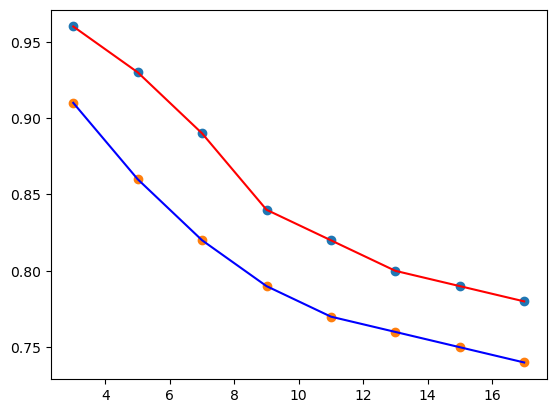

In [120]:
#visualization of different training and test accuracies with k values from 3 to 17
import matplotlib.pyplot as plt
plt.scatter(range(3, 18, 2),training_accuracy_list)
plt.plot(range(3, 18, 2),training_accuracy_list,color='red')
plt.scatter(range(3, 18, 2),test_accuracy_list)
plt.plot(range(3, 18, 2),test_accuracy_list,color='blue')
plt.show()

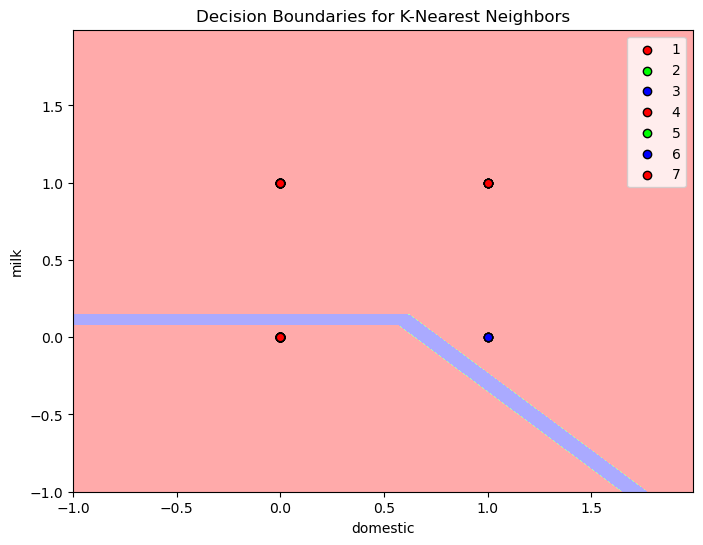

In [122]:
# Visualize the decision boundaries of the classifier.

# Choose two features for visualization (e.g., 'domestic' and 'milk')
feature1_index = X.columns.get_loc('domestic')
feature2_index = X.columns.get_loc('milk')

# Create a meshgrid for plotting decision boundaries
x_min, x_max = X.iloc[:, feature1_index].min() - 1, X.iloc[:, feature1_index].max() + 1
y_min, y_max = X.iloc[:, feature2_index].min() - 1, X.iloc[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Create a DataFrame with all features, filling with mean values for other features
meshgrid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[X.columns[feature1_index], X.columns[feature2_index]])
for col in X.columns:
    if col not in meshgrid_df.columns:
        meshgrid_df[col] = X[col].mean()  # Fill other features with their mean values

# Reorder columns to match the original training data
meshgrid_df = meshgrid_df[X.columns]

# Predict the class for each point in the meshgrid using the complete feature set
Z = model.predict(meshgrid_df)
Z = Z.reshape(xx.shape)

# Create a color map for the decision boundaries
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


# Plot the decision boundaries and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot data points
for i, target in enumerate(np.unique(Y)):
    plt.scatter(X.loc[Y == target, X.columns[feature1_index]],
                X.loc[Y == target, X.columns[feature2_index]],
                color=cmap_bold.colors[i % len(cmap_bold.colors)],
                label=target, edgecolor='k')

plt.xlabel(X.columns[feature1_index])
plt.ylabel(X.columns[feature2_index])
plt.title('Decision Boundaries for K-Nearest Neighbors')
plt.legend()
plt.show()